# Convolution

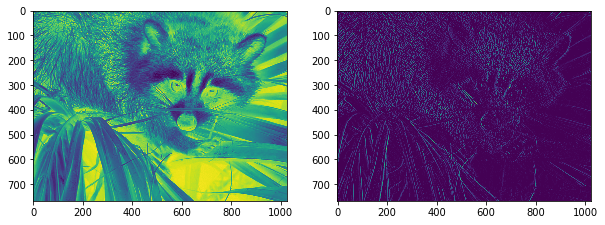

In [4]:
%matplotlib inline
import scipy as sp
import numpy as np
import matplotlib.pylab as plt
import scipy.ndimage  # scikit_image
import scipy.misc

# 반전 0 ~ 255
img = 255 - sp.misc.face(gray=True).astype(float)   # 이미지, 동영상

# edge detection filter - 경계선 검출
k = np.zeros((2,2))
# 0 0 
# 0 0
k[:,0] = 1; k[:,1] = -1
# 1 -1 
# 1 -1

# convolve 이미지에서 필터, 정보통신 무선신호 복원
img2 = np.maximum(0,sp.ndimage.filters.convolve(img,k))
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.imshow(img)
plt.grid(False) # 격자
plt.subplot(122)
plt.imshow(img2)
plt.grid(False)
plt.show()

2 427 640 3


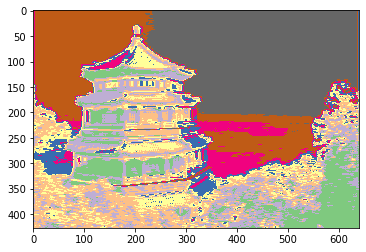

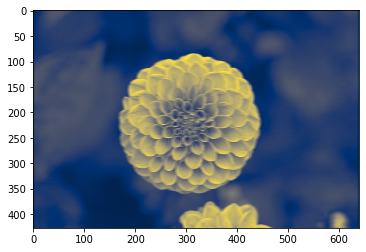

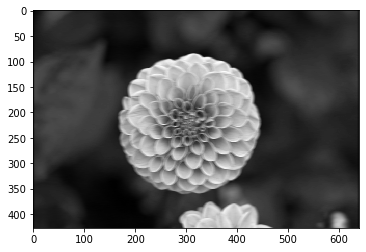

(2, 427, 640, 2)


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
import tensorflow as tf

# 데이터 불러오기
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
# 이미지 정규화 (255로 나눠주기) <- 0~1로 바꿔줌


# 데이터 변환(배치 사이즈)
dataset = np.array([china, flower], dtype = np.float32)  # np.array는 사이즈를 변하게 할수 있다
batch_size, height, width, channels = dataset.shape
print(batch_size, height, width, channels)  # 2, 427, 640, 3 (컬러 rgb로 들어옴)
        # 장수,   높이,   넓이,  컬러수          (행),(열)


# 필터생성
filters = np.zeros(shape = (7,7, channels, 2), dtype = np.float32)
# 0 0 0 1 0 0 0 
# 0 0 0 1 0 0 0 
# 0 0 0 1 0 0 0 
# 0 0 0 1 0 0 0 
# 0 0 0 1 0 0 0 
# 0 0 0 1 0 0 0 
# 0 0 0 1 0 0 0 
# 이런걸 2개 만들어줌 (가로로 하나 더)

filters[:,3,:,0] = 1
filters[3,:,:,1] = 1


# 주입변수(placeholder) 2, 427, 640, 3
# 여기서는 2장이 들어와서 이미 2차원이므로 자동 4차원이 되어서 none (차원수 맞춰줄 필요가 없어서)
X = tf.placeholder(tf.float32, shape = (None, height, width, channels))
                                      # 이 순서로 이미지 포맷 결정돼있다.(이렇게 써줘야함)
convolution = tf.nn.conv2d(X, filters, strides = [1,1,1,1], padding = "SAME")  # "SAME" : 427 x 640

# valid => 421 x 634



# --------------여기까지 graph 정의----------------

# convolution 호출
with tf.Session() as sess:
    output = sess.run(convolution, feed_dict = {X : dataset})
    
    
plt.imshow(output[0,:,:,1], cmap = "Accent")
plt.show()
plt.imshow(output[1,:,:,1], cmap = "cividis")
plt.show()
plt.imshow(output[1,:,:,1], cmap = "gray")
plt.show()

type(output)
print(output.shape)


# 스트라이드가 1일때 2 427 640 2(필터가 2개 ) 


# 이미지 4장을 넣어서 채널 2개를 만들면 한장당 2장씩 나온다(채널이 2개라서)

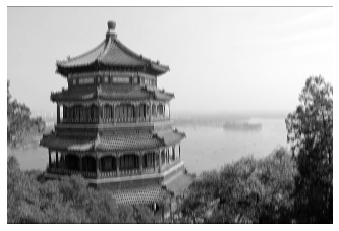

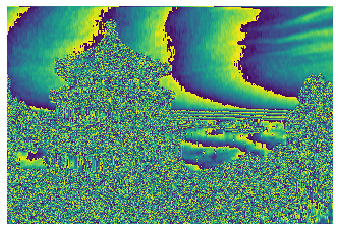

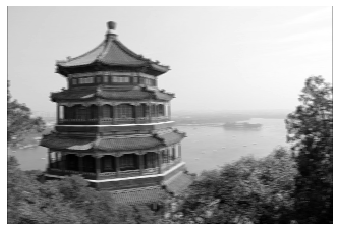

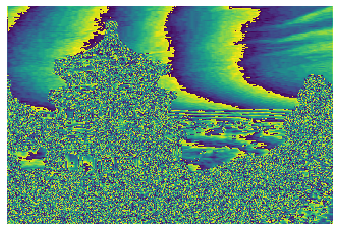

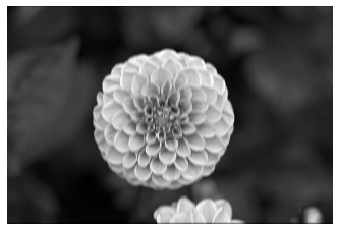

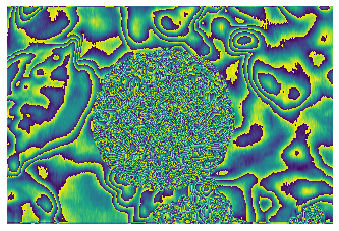

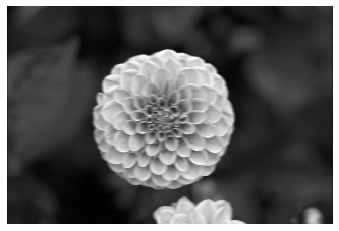

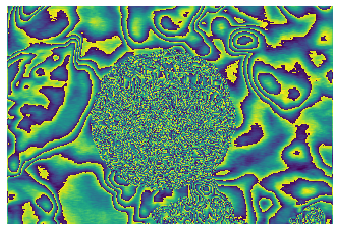

In [38]:
def plot_image(image):
    plt.imshow(image, cmap = "gray", interpolation = "nearest")
    plt.axis("off")
    
def plot_color_image(image):
    plt.imshow(image.astype(np.uint8), interpolation = "nearest")
    plt.axis("off")


for image_index in (0,1):
    for feature_map_index in (0,1):
        plot_image(output[image_index, :, :, feature_map_index])
        plt.show()
        
        plot_color_image(output[image_index, :, :, feature_map_index])
        plt.show()


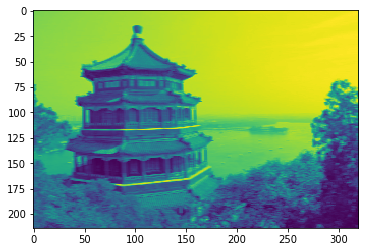

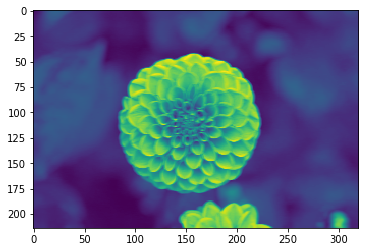

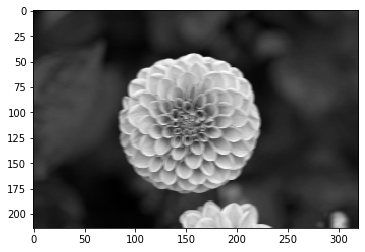

(2, 214, 320, 2)


In [45]:
# max_pool <= 사이즈 줄이기

X = tf.placeholder(tf.float32, shape = (None, height, width, channels))
                                      # 이 순서로 이미지 포맷 결정돼있다.(이렇게 써줘야함)

convolution = tf.nn.conv2d(X, filters, strides = [1,1,1,1], padding = "SAME") 
 
# 사이즈 감소
max_pool = tf.nn.max_pool(convolution,ksize = [1,2,2,1], # 2x2
                          strides = [1,2,2,1], padding = "SAME")  


with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict = {X : dataset})
    
    
plt.imshow(output[0,:,:,1])
plt.show()
plt.imshow(output[1,:,:,1])
plt.show()
plt.imshow(output[1,:,:,1], cmap = "gray")
plt.show()

type(output)
print(output.shape)


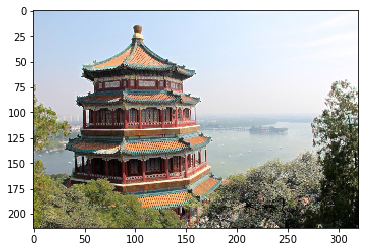

In [50]:
# max_pooling 된 결과를 이미지 출력하시오
# conv2d 채널1개로 생성
# 채널을 그대로 = 컬러 출력

                          # 원래이미지
max_pool = tf.nn.max_pool(X,ksize = [1,2,2,1], # 2x2
                          strides = [1,2,2,1], padding = "SAME")  

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict = {X:dataset})

# plt.imshow(output[0])   <- 이렇게 하면 아무것도 나오지 않는다
plt.imshow(output[0].astype(np.uint8)) # unsigned int 형(양수)
plt.show()

# 숫자이미지

Extracting tmp/data/train-images-idx3-ubyte.gz
Extracting tmp/data/train-labels-idx1-ubyte.gz
Extracting tmp/data/t10k-images-idx3-ubyte.gz
Extracting tmp/data/t10k-labels-idx1-ubyte.gz


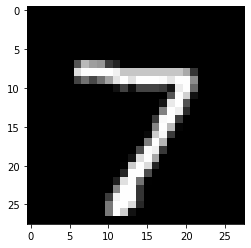

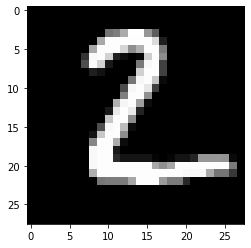

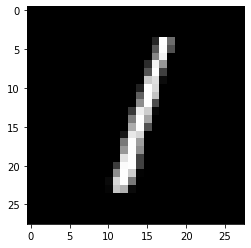

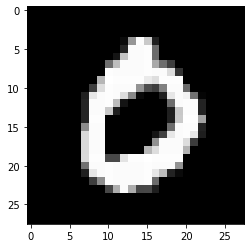

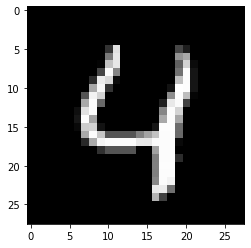

In [53]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as p
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("tmp/data/", one_hot=True)

# 5장의 이미지 출력


# 이미지 5장 출력 (한번에)
first_image = mnist.test.images[0:5]
first_image = np.array(first_image, dtype = 'float')

for i in range(5):
    pixels = first_image[i].reshape((28,28))
    plt.imshow(pixels, cmap = 'gray')
    plt.show()

    
#    
first_image = mnist.test.images[0] # 이미지 0번   # 784
pixels = first_image.reshape((28,28))
plt.imshow(pixels, cmap = 'gray')
plt.show()
#


# 과적합방지
 - dropout = 0.75     
      - 과적합 방지를 위해서 임의적으로 25% 계산을 버림.
      - random(임의적으로 진행)
                   
387pg 참고(핸즈온)

In [118]:
# 과적합방지

learning_rate = 0.001  # optimizer  사용
num_steps = 500      # epoch
batch_size = 128     # mini batch 사용
display_step = 10    # 시각화


num_input = 784     # 이미지 28x28 => fully-connected (한줄로 연결되었다)
num_classes = 10   # one-hot-encoding
dropout = 0.75     # 과적합 방지를 위해서 임의적으로 25% 계산을 버림.
                   # random(임의적으로 진행)
    
                              # none : batch_size 크기만큼 들어온다
X = tf.placeholder(tf.float32, [None, num_input], name = "input")    # 훈련데이터
Y = tf.placeholder(tf.float32, [None, num_classes], name = "output")  # 종속변수로 받음
                        # 이름 저장하기 : 나중에 불러오기, 위치찾기

keep_prob = tf.placeholder(tf.float32, name ="keep")

1번 이상 반복되면 함수화 해야한다

In [119]:
# 1번 이상 반복되면 함수화 해야한다
# activation function 마지막에 한번 호출 : 회귀인지 분류인지 결정
# multi-layer : XOR 문제를 해결하는 것은 activation 함수를 이용해서 비선형으로 문제를 풀어야한다
# cnn <- deep할 수록 결과가 좋다

def conv2d(x, W, b, strides = 1):
    # 가중치 : filter
    x = tf.nn.conv2d(x, W, strides = [1, strides, strides, 1], padding = 'SAME')
    x = tf.nn.bias_add(x,b)
    return tf.nn.relu(x)   # relu 로 통과 => 비선형 mapping
# 1.convol과 2.relu 쌓기

def maxpool2d(x, k=2):  
    return tf.nn.max_pool(x, ksize = [1,k,k,1], # max, avg
                          strides = [1,k,k,1], # 값은 다르지만 이미지 사이즈 동일 # 2로주면 (반타작)
                          padding = 'SAME')
# 3.pooling 쌓기

In [120]:
def conv_net(x, weights, biases, dropout):  # 128 x 784 (flatten된 형태)
    
    # 원래이미지 형태로 바꿈 (128x28x28x1)
    x = tf.reshape(x, shape = [-1, 28,28,1])  # -1: 알아서 계산해라(정의하지 않는다) <- 위에 X를 none으로 줘서
    
    #128x28x28x32(필터32장 : 5x5이미지에서 한장의 이미지를 32장 필터(특징)로 출력한다)
    conv1 = conv2d(x, weights['wc1'], biases['bc1']) # conv와 relu된상태에서
    conv1 = maxpool2d(conv1, k=2)           # pooling 하기 -> 128x 14x 14x 32(특징은 변하지 않는다) <- 단지 이미지 사이즈만 줄임
    
    
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2']) # 128 x 14 x 14 x 64
    conv2 = maxpool2d(conv2, k=2)                        #128 x 7 x 7 x 64 (플링)
    
 # CNN (주변고려)특징 추출 => FFNN(feed forward neural network)   
    
    # [0]사이즈 : 7*7*64, 1024  <- fully-connected 된다
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])  
    
    # 128 x 7*7*64, 7*7*64, 1024  => 128x1024
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    
    # relu 달아주기
    fc1 = tf.nn.relu(fc1)
    
    # 25%의 계산을 버린다 (과적합방지)
    fc1 = tf.nn.dropout(fc1, dropout) # dropout은 hyper parameter(사람이 지정해야하지만 자동화해서 알아서 저장하게함)
    
    # 128x1024, 1024x10 => 128x10
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    
    return out

In [121]:
# 가중치 & 편향

weights = {
    'wc1':tf.Variable(tf.random_normal([5,5,1,32])),  # 필터 32개 => 14, 14, 32 (pooling해줘서 반으로 작아짐)
    'wc2':tf.Variable(tf.random_normal([5,5,32,64])), # 필터 64개 => 7 ,7, 64 (pooling해줘서 반으로 작아짐)
    'wd1':tf.Variable(tf.random_normal([7*7*64, 1024])), #flatten (1차원으로 만들기 위해 다 곱한다)
    'out':tf.Variable(tf.random_normal([1024, num_classes]))
}

biases = {
    'bc1':tf.Variable(tf.random_normal([32])),
    'bc2':tf.Variable(tf.random_normal([64])),
    'bd1':tf.Variable(tf.random_normal([1024])),
    'out':tf.Variable(tf.random_normal([num_classes]))
}

In [122]:
# 정의하기
logits = conv_net(X, weights, biases, keep_prob)  # 128x10
prediction = tf.nn.softmax(logits)
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
train_op = optimizer.minimize(loss_op)
correct_pred = tf.equal(tf.argmax(prediction,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
init = tf.global_variables_initializer()

In [123]:
# 실행시키기

with tf.Session() as sess:
    sess.run(init)
    for step in range(1,num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_op, feed_dict = {X:batch_x, Y: batch_y, keep_prob: dropout})
        
        if step % display_step == 0 or step ==1:
            loss, acc = sess.run([loss_op, accuracy], feed_dict = {X:batch_x, Y:batch_y,keep_prob: 1.0 })
            print("Step "+str(step)+", Minibatch Loss = "+"{:.4f}".format(loss)+", Training Accuracy = "+ "{:.3f}".format(acc))
    print("Testing Accuracy:",
             sess.run(accuracy, feed_dict = {X:mnist.test.images[:256], Y:mnist.test.labels[:256], keep_prob:1.0}))

Step 1, Minibatch Loss = 57558.8945, Training Accuracy = 0.102
Step 10, Minibatch Loss = 24208.4062, Training Accuracy = 0.250
Step 20, Minibatch Loss = 6617.6743, Training Accuracy = 0.578
Step 30, Minibatch Loss = 5585.6162, Training Accuracy = 0.672
Step 40, Minibatch Loss = 5391.3252, Training Accuracy = 0.742
Step 50, Minibatch Loss = 4732.0400, Training Accuracy = 0.750
Step 60, Minibatch Loss = 1879.0710, Training Accuracy = 0.812
Step 70, Minibatch Loss = 2968.2725, Training Accuracy = 0.812
Step 80, Minibatch Loss = 1975.9719, Training Accuracy = 0.875
Step 90, Minibatch Loss = 2665.4858, Training Accuracy = 0.844
Step 100, Minibatch Loss = 1445.4221, Training Accuracy = 0.859
Step 110, Minibatch Loss = 889.6085, Training Accuracy = 0.914
Step 120, Minibatch Loss = 983.6544, Training Accuracy = 0.891
Step 130, Minibatch Loss = 2033.2933, Training Accuracy = 0.898
Step 140, Minibatch Loss = 1858.3069, Training Accuracy = 0.906
Step 150, Minibatch Loss = 2311.3225, Training Accu

# 문제  & 모델 저장하기
 - 테스트 데이터 100번부터 20개의 데이터를 예측해 보시오
 - 예측된 데이터를 출력해 보시오
    

In [124]:
logits = conv_net(X, weights, biases, keep_prob)  # 20x10
prediction = tf.nn.softmax(logits)
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
train_op = optimizer.minimize(loss_op)
correct_pred = tf.equal(tf.argmax(prediction,1), tf.argmax(Y,1))         # argmax!!
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
init = tf.global_variables_initializer()


# session은 한번 닫으면 다시 안열린다. 그리고 세션이 끝나면 모델도 없어진다. 그래서 모델 저장을 해야한다 
saver = tf.train.Saver()  # 모델 저장공간
with tf.Session() as sess:
    sess.run(init)
    for step in range(1,num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_op, feed_dict = {X:batch_x, Y: batch_y, keep_prob: dropout})
        
        if step % display_step == 0 or step ==1:
            loss, acc = sess.run([loss_op, accuracy], feed_dict = {X:batch_x, Y:batch_y,keep_prob: 1.0 })
            print("Step "+str(step)+", Minibatch Loss = "+"{:.4f}".format(loss)+", Training Accuracy = "+ "{:.3f}".format(acc))
    
    # 학습이 끝나면 모델 저장하기     # 위치선정
    save_path = saver.save(sess, 'data/cnn_model.ckpt')
    print("Testing Accuracy:",
             sess.run(accuracy, feed_dict = {X:mnist.test.images[:256], Y:mnist.test.labels[:256], keep_prob:1.0}))

# prediction
    print("예측 : ", sess.run(tf.argmax(prediction,1), feed_dict = {X:mnist.test.images[100:120], Y:mnist.test.labels[100:120],
                                                                 keep_prob:1.0}))

Step 1, Minibatch Loss = 39167.4766, Training Accuracy = 0.188
Step 10, Minibatch Loss = 17999.6191, Training Accuracy = 0.305
Step 20, Minibatch Loss = 9143.0352, Training Accuracy = 0.586
Step 30, Minibatch Loss = 7705.5479, Training Accuracy = 0.602
Step 40, Minibatch Loss = 2856.4043, Training Accuracy = 0.828
Step 50, Minibatch Loss = 4500.1748, Training Accuracy = 0.742
Step 60, Minibatch Loss = 3225.5193, Training Accuracy = 0.852
Step 70, Minibatch Loss = 2673.5586, Training Accuracy = 0.844
Step 80, Minibatch Loss = 645.5032, Training Accuracy = 0.930
Step 90, Minibatch Loss = 2367.9048, Training Accuracy = 0.836
Step 100, Minibatch Loss = 2138.6484, Training Accuracy = 0.883
Step 110, Minibatch Loss = 1095.0020, Training Accuracy = 0.914
Step 120, Minibatch Loss = 772.3154, Training Accuracy = 0.945
Step 130, Minibatch Loss = 1518.9397, Training Accuracy = 0.883
Step 140, Minibatch Loss = 2517.8271, Training Accuracy = 0.859
Step 150, Minibatch Loss = 1145.4512, Training Accu

naming

In [128]:
# naming
#from tensorflow.python.framework import ops
#import os
#ops.reset_default_graph()

logits = conv_net(X, weights, biases, keep_prob)
prediction = tf.nn.softmax(logits)
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
train_op = optimizer.minimize(loss_op)
correct_pred = tf.equal(tf.argmax(prediction,1), tf.argmax(Y,1))        
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name = "accuracy")

tf.add_to_collection("accuracy", accuracy)
tf.add_to_collection("Xi", X)
tf.add_to_collection("Yi", Y)
#tf.add_to_collection("prediction", prediction)
init = tf.global_variables_initializer()


ValueError: Tensor("Const_6:0", shape=(1,), dtype=int32) must be from the same graph as Tensor("softmax_cross_entropy_with_logits_4/Reshape_2:0", shape=(?,), dtype=float32).

# 저장한 모델 사용

In [129]:
import tensorflow as tf
tf.set_random_seed(777)
sess = tf.InteractiveSession()
new_saver = tf.train.import_meta_graph('data/cnn_model.ckpt.meta')
new_saver.restore(sess,'data/cnn_model.ckpt')
tf.get_default_graph()
Xi = sess.graph.get_tensor_by_name("input:0")
Yi = sess.graph.get_tensor_by_name("output:0")
keep = sess.graph.get_tensor_by_name("keep:0")
accuracy = sess.graph.get_tensor_by_name("accuracy:0")
result = sess.run(accuracy, feed_dict={Xi:mnist.test.images[:256],
                                      Yi:mnist.test.labels[:256],
                                      keep:1.0})
print(result)

INFO:tensorflow:Restoring parameters from data/cnn_model.ckpt


KeyError: "The name 'accuracy:0' refers to a Tensor which does not exist. The operation, 'accuracy', does not exist in the graph."

문제: 
저장된 모델을 로딩한 다음 테스트 데이터 100번부터 20개의 데이터를 예측하여 출력하고 정확도를 출력하시오.

In [130]:
print("예측 : ", sess.run(tf.argmax(prediction,1), feed_dict = {Xi:mnist.test.images[100:120], Yi:mnist.test.labels[100:120],
                                                                 keep:1.0}))
print("Accuracy : ", result)

ValueError: Fetch argument <tf.Tensor 'ArgMax_5:0' shape=(?,) dtype=int64> cannot be interpreted as a Tensor. (Tensor Tensor("ArgMax_5:0", shape=(?,), dtype=int64) is not an element of this graph.)

In [ ]:
import 